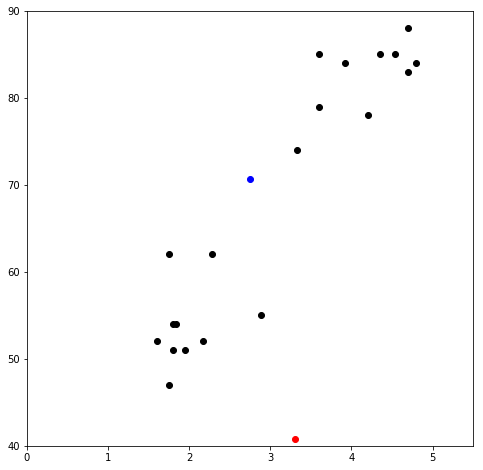

{1: [3.3072657095319187, 40.81250060312988], 2: [2.751217737682236, 70.69831036060886]}


In [155]:
#problem 6b (k=2)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#x is duration, y is wait
df = pd.DataFrame({
    'x': [3.6,1.8,2.283,3.333,2.883,4.533,1.95,1.833,4.7,3.6,1.6,4.35,3.917,4.2,1.75,1.8,4.7,2.167,4.8,1.75],
    'y': [79,54,62,74,55,85,51,54,88,85,52,85,84,78,62,51,83,52,84,47]
})

k = 2
colmap = {1: 'r', 2: 'b', 3: 'y'}
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.uniform(1.5, 5.5), np.random.uniform(40, 90)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'b', 3: 'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()
print(centroids)

       x   y     p1     p2  highscore closestCluster  closestCentroid color
0  3.600  79  0.179  0.821      0.821             p2                2     b
1  1.800  54  0.558  0.442      0.558             p1                1     r
2  2.283  62  0.291  0.709      0.709             p2                2     b
3  3.333  74  0.092  0.908      0.908             p2                2     b
4  2.883  55  0.525  0.475      0.525             p1                1     r


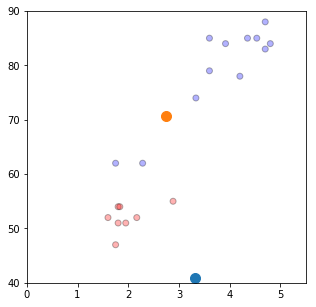

In [160]:
#assignment stage
pd.set_option("display.precision", 3)
def assignment(df, centroids):
    for index, row in df.iterrows():
        totaldist = 0
        #calculate total distance of x to all centroids
        for i in centroids.keys():
            dist = np.sqrt( (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2 )
            totaldist += dist
        for i in centroids.keys():
            dist = np.sqrt( (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2 )
            p = 1/(k-1)*(1-(dist/totaldist)) 
            df['p'+ str(i)] = p
        df['highscore'] = df[['p1','p2']].max(axis=1)
        df['closestCluster'] = df[['p1','p2']].idxmax(axis=1)
        df['closestCentroid'] = df['closestCluster'].str.lstrip('p')
        df['closestCentroid'] = pd.to_numeric(df['closestCentroid'])
        df['color'] = df['closestCentroid'].map(lambda x: colmap[x])
    return df
df = assignment(df, centroids)
df.round(3)
print(df.head())
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color = df['color'] , alpha = 0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i] , s = 100 )
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()


In [161]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closestCentroid'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closestCentroid'] == i]['y'])
    return k

centroids = update(centroids)
  

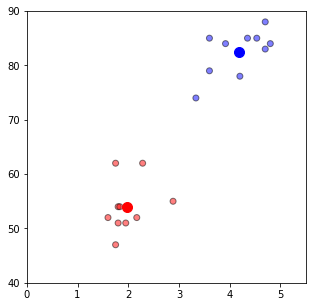

In [162]:
while True:
    df = assignment(df, centroids)
    closest_centroids = df['closestCentroid'].copy(deep=True)
    centroids = update(centroids)
    if closest_centroids.equals(df['closestCentroid']):
        break


fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100, color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()

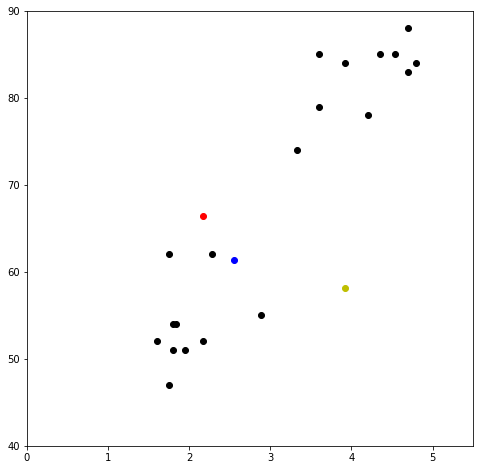

{1: [2.1727757673950063, 66.4752594081314], 2: [2.5470302093708135, 61.36072564813006], 3: [3.9191207319737917, 58.103408870638404]}
       x   y     p1     p2     p3  highscore closestCluster  closestCentroid  \
0  3.600  79  0.377  0.327  0.296      0.377             p1                1   
1  1.800  54  0.245  0.349  0.406      0.406             p3                3   
2  2.283  62  0.262  0.463  0.275      0.463             p2                2   
3  3.333  74  0.395  0.325  0.280      0.395             p1                1   
4  2.883  55  0.228  0.349  0.423      0.423             p3                3   

  color  
0     r  
1     y  
2     b  
3     r  
4     y  


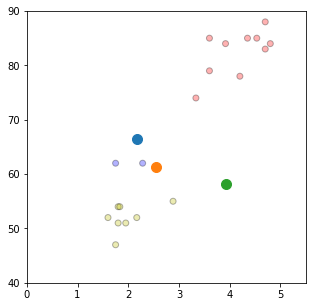

In [166]:
#problem 6b (k=3)
df = pd.DataFrame({
    'x': [3.6,1.8,2.283,3.333,2.883,4.533,1.95,1.833,4.7,3.6,1.6,4.35,3.917,4.2,1.75,1.8,4.7,2.167,4.8,1.75],
    'y': [79,54,62,74,55,85,51,54,88,85,52,85,84,78,62,51,83,52,84,47]
})

k = 3
colmap = {1: 'r', 2: 'b', 3: 'y'}
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.uniform(1.5, 5.5), np.random.uniform(40, 90)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'b', 3: 'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()
print(centroids)
def assignment(df, centroids):
    for index, row in df.iterrows():
        totaldist = 0
        #calculate total distance of x to all centroids
        for i in centroids.keys():
            dist = np.sqrt( (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2 )
            totaldist += dist
        for i in centroids.keys():
            dist = np.sqrt( (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2 )
            p = 1/(k-1)*(1-(dist/totaldist)) 
            df['p'+ str(i)] = p
        df['highscore'] = df[['p1','p2','p3']].max(axis=1)
        df['closestCluster'] = df[['p1','p2','p3']].idxmax(axis=1)
        df['closestCentroid'] = df['closestCluster'].str.lstrip('p')
        df['closestCentroid'] = pd.to_numeric(df['closestCentroid'])
        df['color'] = df['closestCentroid'].map(lambda x: colmap[x])
    return df
df = assignment(df, centroids)
df.round(3)
print(df.head())
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color = df['color'] , alpha = 0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i] , s = 100 )
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()

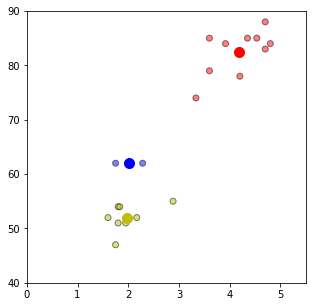

In [167]:
while True:
    df = assignment(df, centroids)
    closest_centroids = df['closestCentroid'].copy(deep=True)
    centroids = update(centroids)
    if closest_centroids.equals(df['closestCentroid']):
        break


fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100, color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()